In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('C:/Users/KIIT/Downloads/winequality-red.csv.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
 import tensorflow
# 75% of the data is selected
train_df = df.sample(frac=0.75, random_state=4)
 
# it drops the training data
# from the original dataframe
val_df = df.drop(train_df.index)

In [5]:
# calling to (0,1) range Scalling
max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0) 
range = max_val - min_val
train_df = (train_df - min_val)/(range)
val_df =  (val_df - min_val)/range

In [6]:
# now let's separate the targets and labels

X_train = train_df.drop('quality',axis=1)
X_val = val_df.drop('quality',axis=1)
y_train = train_df['quality']
y_val = val_df['quality']
 
# We'll need to pass the shape
# of features/inputs as an argument
# in our model, so let's define a variable
# to save it.
input_shape = [X_train.shape[1]]
input_shape

[11]

In [7]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense# Neural network

In [10]:
model = tf.keras.Sequential([
 
    tf.keras.layers.Dense(units=64, activation='sigmoid',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=32, activation='sigmoid'),
   tf.keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [11]:
# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam', 
              # MAE error is good for
              # numerical predictions
              loss='mae') 

In [12]:
losses = model.fit(X_train, y_train,validation_data=(X_val, y_val),
                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=100,
                   epochs=15,  # total epoch
                  )

Epoch 1/15
12/12 [==============================] - 3s 63ms/step - loss: 0.2203 - val_loss: 0.1896
Epoch 2/15
12/12 [==============================] - 0s 14ms/step - loss: 0.1479 - val_loss: 0.1417
Epoch 3/15
12/12 [==============================] - 0s 14ms/step - loss: 0.1328 - val_loss: 0.1337
Epoch 4/15
12/12 [==============================] - 0s 12ms/step - loss: 0.1335 - val_loss: 0.1317
Epoch 5/15
12/12 [==============================] - 0s 14ms/step - loss: 0.1293 - val_loss: 0.1305
Epoch 6/15
12/12 [==============================] - 0s 14ms/step - loss: 0.1285 - val_loss: 0.1313
Epoch 7/15
12/12 [==============================] - 0s 14ms/step - loss: 0.1285 - val_loss: 0.1297
Epoch 8/15
12/12 [==============================] - 0s 13ms/step - loss: 0.1279 - val_loss: 0.1298
Epoch 9/15
12/12 [==============================] - 0s 13ms/step - loss: 0.1282 - val_loss: 0.1289
Epoch 10/15
12/12 [==============================] - 0s 17ms/step - loss: 0.1273 - val_loss: 0.1299
Epoch 11/

In [13]:
X_val.iloc[121:124, :]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
540,0.407080,0.321918,0.303797,0.165517,0.148581,0.267606,0.144876,0.640969,0.347826,0.206061,0.184615
543,0.584071,0.369863,0.303797,0.110345,0.121870,0.211268,0.166078,0.677680,0.173913,0.236364,0.400000
548,0.690265,0.157534,0.620253,0.117241,0.111853,0.366197,0.222615,0.685022,0.226087,0.254545,0.307692


In [14]:
y_val.iloc[121:124]

540    0.4
543    0.6
548    0.6
Name: quality, dtype: float64

In [15]:
# this will pass the first 3 rows of features
# of our data as input to make predictions
model.predict(X_val.iloc[121:124, :])

1/1 [==============================] - 0s 272ms/step


array([[0.5565451 ],
       [0.57602984],
       [0.58285946]], dtype=float32)

<Axes: >

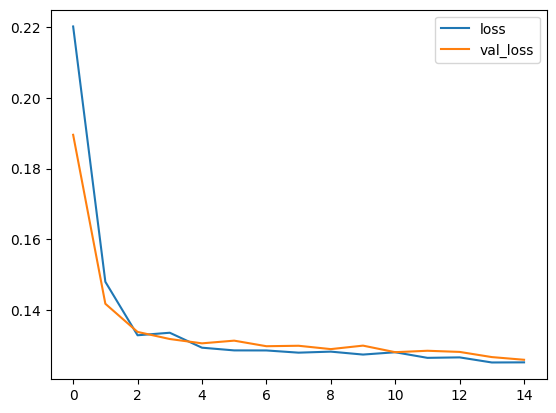

In [16]:
loss_df = pd.DataFrame(losses.history)
# history stores the loss/val
# loss in each epoch
# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['loss','val_loss']].plot()